# TELL Analysis of June 2018 Heat Wave

This notebook processes and makes plots of the temporal evolution of load during the course of the June 2018 heat wave in the western U.S.

In [1]:
# Start by importing required packages and information about your operating system:
import os 
import datetime

import pandas as pd
import matplotlib.pyplot as plt

from glob import glob


## Set the Directory Structure

In [2]:
# Identify the top-level data input and output directories:
tell_data_input_dir =  '/Users/burl878/Documents/Research/IMMM/Data/TELL/Production_Runs/tell_data/outputs/'
eia_data_input_dir =  '/Users/burl878/Documents/Research/IMMM/Data/TELL_Input_Data/inputs/BA_Hourly_Load/CSV_Files/'
data_output_dir =  '/Users/burl878/Documents/code_repos/ntp_heat_wave/data'
image_output_dir =  '/Users/burl878/Documents/code_repos/ntp_heat_wave/plots'

# If the "data_output_dir" subdirectory doesn't exist then create it:
if not os.path.exists(data_output_dir):
   os.makedirs(data_output_dir)

# If the "image_output_dir" subdirectory doesn't exist then create it:
if not os.path.exists(image_output_dir):
   os.makedirs(image_output_dir)


## Set the Balancing Authority You Want to Plot

In [3]:
# Give the EIA BA abbreviation for the BA you want to analyze:
ba_to_plot = 'BPAT'


## Process the Historical Load Time Series:

In [4]:
# Read in the historical EIA-930 load data:
historical_df = pd.read_csv((eia_data_input_dir + ba_to_plot + '_Hourly_Load_Data.csv'))

# Rename some columns:
historical_df.rename(columns={'Adjusted_Demand_MWh': 'historic'}, inplace=True)

# Only keep the columns that are needed:
historical_df = historical_df[['Year', 'Month', 'Day', 'Hour', 'historic']].copy()

# Subset to only June of 2018:
historical_df = historical_df.loc[(historical_df['Year'] == 2018) & (historical_df['Month'] == 6)]

# Return the historical dataframe:
historical_df


,Year,Month,Day,Hour,historic
25576,2018,6,1,0,6221
25577,2018,6,1,1,6302
25578,2018,6,1,2,6423
25579,2018,6,1,3,6383
25580,2018,6,1,4,6421
...,...,...,...,...,...
26291,2018,6,30,19,6157
26292,2018,6,30,20,6267
26293,2018,6,30,21,6258
26294,2018,6,30,22,6236


## Process the Future Load Data

In [5]:
# Read in the rcp45cooler_ssp3 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'tell_output/rcp45cooler_ssp3/2058/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2058_Scaled_2058.csv'))
temp_df = temp_df.loc[temp_df['BA_Code'].isin([ba_to_plot])].copy()
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Scaled_TELL_BA_Load_MWh': 'rcp45cooler_ssp3'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp45cooler_ssp3']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Read in the rcp45cooler_ssp5 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'tell_output/rcp45cooler_ssp5/2058/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2058_Scaled_2058.csv'))
temp_df = temp_df.loc[temp_df['BA_Code'].isin([ba_to_plot])].copy()
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Scaled_TELL_BA_Load_MWh': 'rcp45cooler_ssp5'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp45cooler_ssp5']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Read in the rcp45hotter_ssp3 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'tell_output/rcp45hotter_ssp3/2058/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2058_Scaled_2058.csv'))
temp_df = temp_df.loc[temp_df['BA_Code'].isin([ba_to_plot])].copy()
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Scaled_TELL_BA_Load_MWh': 'rcp45hotter_ssp3'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp45hotter_ssp3']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Read in the rcp45hotter_ssp5 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'tell_output/rcp45hotter_ssp5/2058/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2058_Scaled_2058.csv'))
temp_df = temp_df.loc[temp_df['BA_Code'].isin([ba_to_plot])].copy()
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Scaled_TELL_BA_Load_MWh': 'rcp45hotter_ssp5'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp45hotter_ssp5']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Read in the rcp85cooler_ssp3 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'tell_output/rcp85cooler_ssp3/2058/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2058_Scaled_2058.csv'))
temp_df = temp_df.loc[temp_df['BA_Code'].isin([ba_to_plot])].copy()
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Scaled_TELL_BA_Load_MWh': 'rcp85cooler_ssp3'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp85cooler_ssp3']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Read in the rcp85cooler_ssp5 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'tell_output/rcp85cooler_ssp5/2058/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2058_Scaled_2058.csv'))
temp_df = temp_df.loc[temp_df['BA_Code'].isin([ba_to_plot])].copy()
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Scaled_TELL_BA_Load_MWh': 'rcp85cooler_ssp5'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp85cooler_ssp5']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Read in the rcp85hotter_ssp3 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'tell_output/rcp85hotter_ssp3/2058/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2058_Scaled_2058.csv'))
temp_df = temp_df.loc[temp_df['BA_Code'].isin([ba_to_plot])].copy()
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Scaled_TELL_BA_Load_MWh': 'rcp85hotter_ssp3'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp85hotter_ssp3']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Read in the rcp85hotter_ssp5 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'tell_output/rcp85hotter_ssp5/2058/' + 'TELL_Balancing_Authority_Hourly_Load_Data_2058_Scaled_2058.csv'))
temp_df = temp_df.loc[temp_df['BA_Code'].isin([ba_to_plot])].copy()
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Scaled_TELL_BA_Load_MWh': 'rcp85hotter_ssp5'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp85hotter_ssp5']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Convert the time to a datetime variable:
cols=["Year","Month","Day","Hour"]
historical_df['date'] = historical_df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
historical_df['Time_UTC'] = pd.to_datetime(historical_df['date'], format='%Y-%m-%d-%H')

# Shorten the name:
plot_df = historical_df

# Only keep the columns that are needed:
plot_df = plot_df[['Time_UTC', 'historic', 'rcp45cooler_ssp3', 'rcp45cooler_ssp5', 'rcp45hotter_ssp3', 'rcp45hotter_ssp5', 'rcp85cooler_ssp3', 'rcp85cooler_ssp5', 'rcp85hotter_ssp3', 'rcp85hotter_ssp5']].copy()

# Return the dataframe you want to plot:
plot_df

,Time_UTC,historic,rcp45cooler_ssp3,rcp45cooler_ssp5,rcp45hotter_ssp3,rcp45hotter_ssp5,rcp85cooler_ssp3,rcp85cooler_ssp5,rcp85hotter_ssp3,rcp85hotter_ssp5
0,2018-06-01 00:00:00,6221,7300.86,10102.58,7297.03,10154.10,7749.44,10179.99,7792.82,10248.60
1,2018-06-01 01:00:00,6302,7425.32,10281.61,7411.26,10318.47,7911.84,10386.62,7953.29,10460.26
2,2018-06-01 02:00:00,6423,7503.73,10390.76,7509.92,10454.79,8028.80,10546.06,8062.76,10612.69
3,2018-06-01 03:00:00,6383,7717.57,10693.50,7704.01,10731.82,8200.04,10776.99,8291.63,10917.77
4,2018-06-01 04:00:00,6421,7629.51,10569.17,7609.93,10594.06,8099.43,10639.56,8180.16,10768.22
...,...,...,...,...,...,...,...,...,...,...
715,2018-06-30 19:00:00,6157,7702.26,10603.72,7785.16,10800.70,8279.99,10835.45,8431.52,11052.07
716,2018-06-30 20:00:00,6267,7818.35,10765.08,7874.04,10911.91,8390.67,10976.48,8544.55,11199.51
717,2018-06-30 21:00:00,6258,7895.51,10867.78,7933.53,10990.59,8472.33,11077.43,8614.84,11283.40
718,2018-06-30 22:00:00,6236,7926.80,10939.52,7984.79,11086.78,8548.49,11207.53,8665.81,11363.40


In [6]:
# Read in the historical EIA-930 load data:
historical_df = pd.read_csv((eia_data_input_dir + ba_to_plot + '_Hourly_Load_Data.csv'))

# Rename some columns:
historical_df.rename(columns={'Adjusted_Demand_MWh': 'historic'}, inplace=True)

# Only keep the columns that are needed:
historical_df = historical_df[['Year', 'Month', 'Day', 'Hour', 'historic']].copy()

# Subset to only June of 2018:
historical_df = historical_df.loc[(historical_df['Year'] == 2018) & (historical_df['Month'] == 6)]

# Return the historical dataframe:
historical_df


,Year,Month,Day,Hour,historic
25576,2018,6,1,0,6221
25577,2018,6,1,1,6302
25578,2018,6,1,2,6423
25579,2018,6,1,3,6383
25580,2018,6,1,4,6421
...,...,...,...,...,...
26291,2018,6,30,19,6157
26292,2018,6,30,20,6267
26293,2018,6,30,21,6258
26294,2018,6,30,22,6236


In [7]:
# Read in the rcp45cooler_ssp3 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'mlp_output/rcp45cooler_ssp3/2058/' + ba_to_plot + '_2058_mlp_output.csv'))
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Load': 'rcp45cooler_ssp3'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp45cooler_ssp3']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Read in the rcp45hotter_ssp3 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'mlp_output/rcp45hotter_ssp3/2058/' + ba_to_plot + '_2058_mlp_output.csv'))
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Load': 'rcp45hotter_ssp3'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp45hotter_ssp3']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Read in the rcp85cooler_ssp3 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'mlp_output/rcp85cooler_ssp3/2058/' + ba_to_plot + '_2058_mlp_output.csv'))
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Load': 'rcp85cooler_ssp3'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp85cooler_ssp3']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Read in the rcp85hotter_ssp3 load data:
temp_df = pd.read_csv((tell_data_input_dir + 'mlp_output/rcp85hotter_ssp3/2058/' + ba_to_plot + '_2058_mlp_output.csv'))
temp_df['Month'] = pd.DatetimeIndex(temp_df['Time_UTC']).month
temp_df['Day'] = pd.DatetimeIndex(temp_df['Time_UTC']).day
temp_df['Hour'] = pd.DatetimeIndex(temp_df['Time_UTC']).hour
temp_df.rename(columns={'Load': 'rcp85hotter_ssp3'}, inplace=True)
temp_df = temp_df[['Month', 'Day', 'Hour', 'rcp85hotter_ssp3']].copy()
historical_df = pd.merge(historical_df, temp_df, how='left', on=['Month', 'Day', 'Hour'])
del temp_df

# Convert the time to a datetime variable:
cols=["Year","Month","Day","Hour"]
historical_df['date'] = historical_df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
historical_df['Time_UTC'] = pd.to_datetime(historical_df['date'], format='%Y-%m-%d-%H')

# Shorten the name:
plot_temp_df = historical_df

# Only keep the columns that are needed:
plot_temp_df = plot_temp_df[['Time_UTC', 'historic', 'rcp45cooler_ssp3', 'rcp45hotter_ssp3', 'rcp85cooler_ssp3', 'rcp85hotter_ssp3']].copy()

# Return the dataframe you want to plot:
plot_temp_df


,Time_UTC,historic,rcp45cooler_ssp3,rcp45hotter_ssp3,rcp85cooler_ssp3,rcp85hotter_ssp3
0,2018-06-01 00:00:00,6221,5782.65,5825.11,5844.18,5861.89
1,2018-06-01 01:00:00,6302,5881.23,5916.30,5966.65,5982.60
2,2018-06-01 02:00:00,6423,5943.34,5995.06,6054.86,6064.94
3,2018-06-01 03:00:00,6383,6112.71,6150.00,6184.00,6237.10
4,2018-06-01 04:00:00,6421,6042.96,6074.90,6108.12,6153.25
...,...,...,...,...,...,...
715,2018-06-30 19:00:00,6157,6100.58,6214.78,6244.29,6342.33
716,2018-06-30 20:00:00,6267,6192.53,6285.73,6327.76,6427.35
717,2018-06-30 21:00:00,6258,6253.65,6333.22,6389.34,6480.23
718,2018-06-30 22:00:00,6236,6278.43,6374.14,6446.78,6518.57


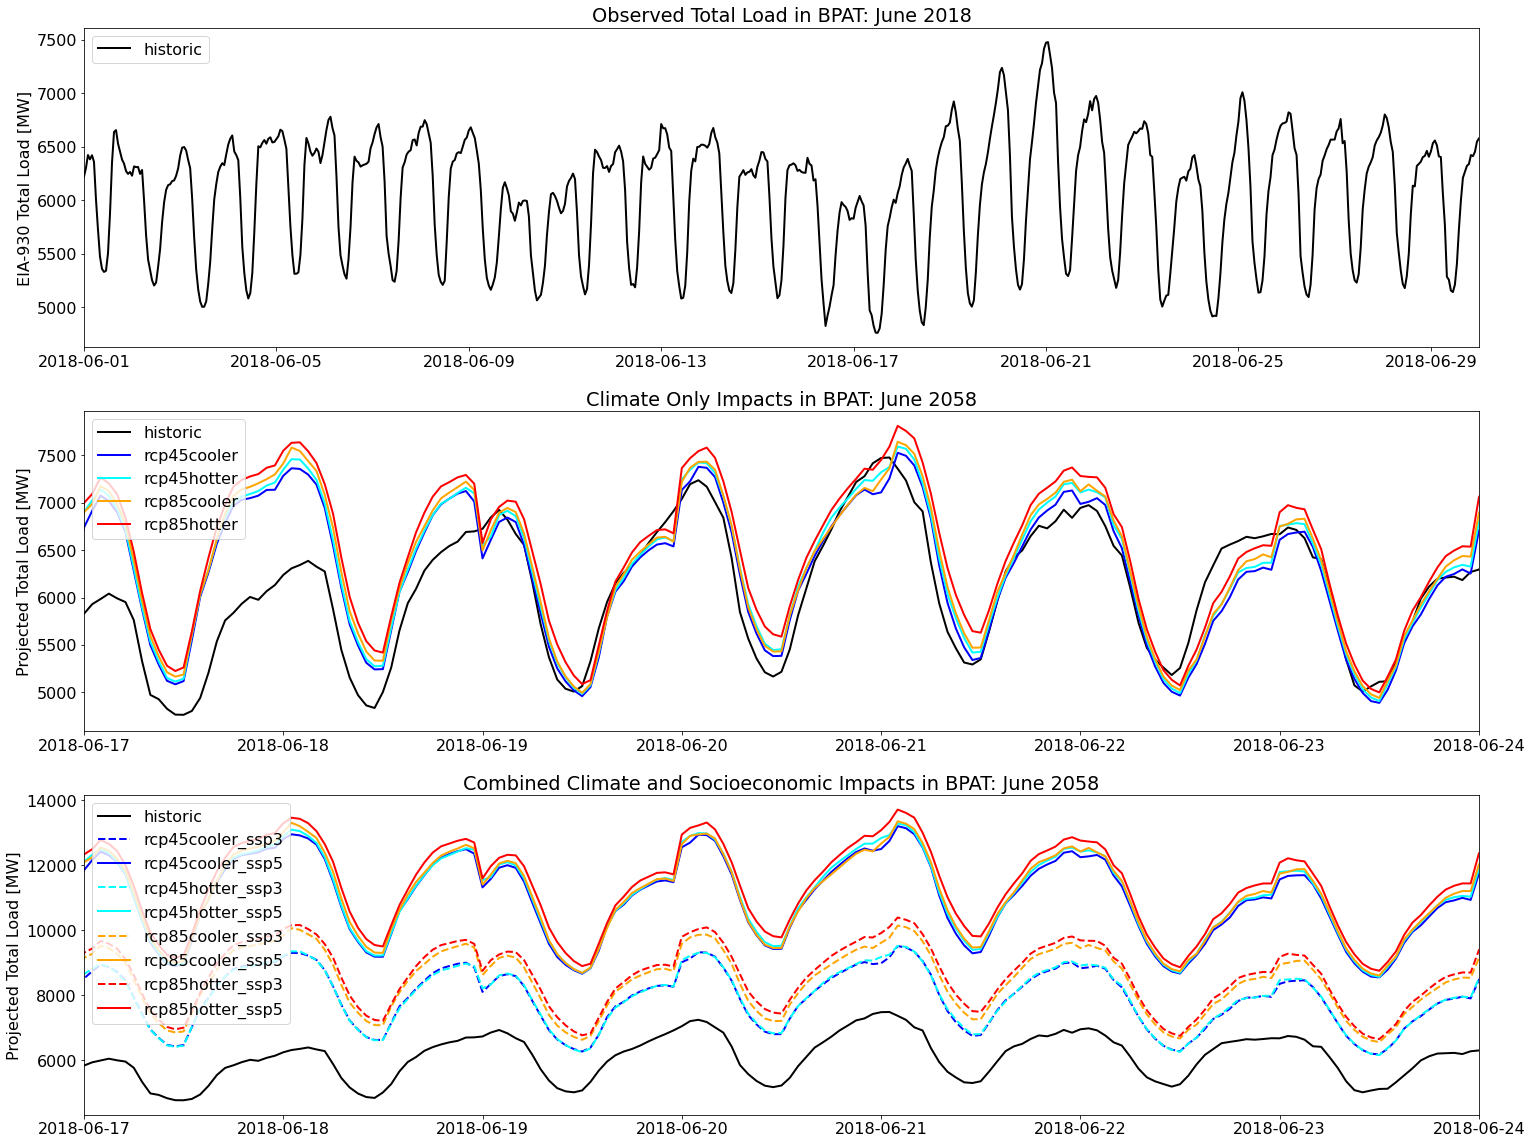

In [9]:
# Make the plot:
plt.figure(figsize=(25, 20))
plt.rcParams['font.size'] = 16
plt.subplot(3,1,1)
plt.plot(plot_df['Time_UTC'], plot_df['historic'], color='k', linestyle='-', label='historic', linewidth=2)
plt.xlim([datetime.date(2018, 6, 1), datetime.date(2018, 6, 30)])
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('EIA-930 Total Load [MW]')
plt.title(('Observed Total Load in ' + ba_to_plot + ': June 2018'))

plt.subplot(3,1,2)
plt.plot(plot_temp_df['Time_UTC'], plot_temp_df['historic'], color='k', linestyle='-', label='historic', linewidth=2)
plt.plot(plot_temp_df['Time_UTC'], plot_temp_df['rcp45cooler_ssp3'], color='b', linestyle='-', label='rcp45cooler', linewidth=2)
plt.plot(plot_temp_df['Time_UTC'], plot_temp_df['rcp45hotter_ssp3'], color='cyan', linestyle='-', label='rcp45hotter', linewidth=2)
plt.plot(plot_temp_df['Time_UTC'], plot_temp_df['rcp85cooler_ssp3'], color='orange', linestyle='-', label='rcp85cooler', linewidth=2)
plt.plot(plot_temp_df['Time_UTC'], plot_temp_df['rcp85hotter_ssp3'], color='red', linestyle='-', label='rcp85hotter', linewidth=2)
plt.xlim([datetime.date(2018, 6, 17), datetime.date(2018, 6, 24)])
plt.legend(loc='upper left')
#plt.xticks([])
plt.xlabel('')
plt.ylabel('Projected Total Load [MW]')
plt.title(('Climate Only Impacts in ' + ba_to_plot + ': June 2058'))


plt.subplot(3,1,3)
plt.plot(plot_df['Time_UTC'], plot_df['historic'], color='k', linestyle='-', label='historic', linewidth=2)
plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp3'], color='b', linestyle='--', label='rcp45cooler_ssp3', linewidth=2)
plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp5'], color='b', linestyle='-', label='rcp45cooler_ssp5', linewidth=2)
plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp3'], color='cyan', linestyle='--', label='rcp45hotter_ssp3', linewidth=2)
plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp5'], color='cyan', linestyle='-', label='rcp45hotter_ssp5', linewidth=2)
plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp3'], color='orange', linestyle='--', label='rcp85cooler_ssp3', linewidth=2)
plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp5'], color='orange', linestyle='-', label='rcp85cooler_ssp5', linewidth=2)
plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp3'], color='red', linestyle='--', label='rcp85hotter_ssp3', linewidth=2)
plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp5'], color='red', linestyle='-', label='rcp85hotter_ssp5', linewidth=2)
plt.xlim([datetime.date(2018, 6, 17), datetime.date(2018, 6, 24)])
plt.legend(loc='upper left')
#plt.xticks([])
plt.xlabel('')
plt.ylabel('Projected Total Load [MW]')
plt.title(('Combined Climate and Socioeconomic Impacts in ' + ba_to_plot + ': June 2058'))

filename = ('June_2018_Heatwave_' + ba_to_plot + '.png')
plt.savefig(os.path.join(image_output_dir, filename), dpi=300, bbox_inches='tight', facecolor='white')
